## Flight Fare Prediction

### Description

Guessing the flight prices can be very hard sometimes, today we might see a price but when we check out the same flight the price might be different. We might have often heard travelers saying that flight ticket prices are so unpredictable. Here we will be provided with different prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [67]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#loading train dataset
traindf = pd.read_excel('C:\Praxis\Dataset\Flight Fare Prediction\Data_Train.xlsx')
traindf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### EDA

In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
traindf.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
traindf.describe(include = 'all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [5]:
traindf.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
traindf.isnull().sum() #There are only 2 null values in our dataset, one in Route and one in Total_Stops

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
traindf.dropna(inplace = True) #dropped null values. 

In [9]:
traindf[traindf.duplicated()].head() #checking duplicate values in our dataframe.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [10]:
traindf.drop_duplicates(keep='first',inplace= True) #droppped duplicate values

In [11]:
traindf.shape

(10462, 11)

In [12]:
traindf['Airline'].unique() #unique airlines

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [13]:
traindf['Airline'].value_counts()  #mostly used airline is Jet Airways and Indigo

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
traindf['Route'].value_counts() #often traveled route is Delhi -> Bombay -> Cochin after that Bengaluru -> Delhi

DEL → BOM → COK                2376
BLR → DEL                      1536
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → UDR → DEL → HYD             1
BOM → NDC → HYD                   1
BOM → JAI → DEL → HYD             1
BOM → GOI → HYD                   1
BLR → HBX → BOM → BHO → DEL       1
Name: Route, Length: 128, dtype: int64

In [16]:
#loading test dataset
testdf = pd.read_excel('C:\Praxis\Dataset\Flight Fare Prediction\Test_set.xlsx')
testdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [17]:
testdf.isnull().sum() #no null values in test dataset

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Feature Engineering

In [18]:
traindf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
# Dividing data into features and labels
# converting whole duration of journey into minutes for both test and train dataset

traindf['Duration'] = traindf['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
testdf['Duration'] = testdf['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [21]:
# separating Date_of_Journey into 2 variables journey day and journey month for train set

traindf["Journey_day"] = traindf['Date_of_Journey'].str.split('/').str[0].astype(int)
traindf["Journey_month"] = traindf['Date_of_Journey'].str.split('/').str[1].astype(int)
traindf.drop(["Date_of_Journey"], axis = 1, inplace = True)

# similarily Dep_Time into departure hour and departure minute for train set

traindf["Dep_hour"] = pd.to_datetime(traindf["Dep_Time"]).dt.hour
traindf["Dep_min"] = pd.to_datetime(traindf["Dep_Time"]).dt.minute
traindf.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time into arrival hour and arrival minute for train set

traindf["Arrival_hour"] = pd.to_datetime(traindf.Arrival_Time).dt.hour
traindf["Arrival_min"] = pd.to_datetime(traindf.Arrival_Time).dt.minute
traindf.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
# separating Date_of_Journey into 2 variables journey day and journey month for test set

testdf["Journey_day"] = testdf['Date_of_Journey'].str.split('/').str[0].astype(int)
testdf["Journey_month"] = testdf['Date_of_Journey'].str.split('/').str[1].astype(int)
testdf.drop(["Date_of_Journey"], axis = 1, inplace = True)

#  similarily Dep_Time into departure hour and departure minute for test set

testdf["Dep_hour"] = pd.to_datetime(testdf["Dep_Time"]).dt.hour
testdf["Dep_min"] = pd.to_datetime(testdf["Dep_Time"]).dt.minute
testdf.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time into arrival hour and arrival minute for test set

testdf["Arrival_hour"] = pd.to_datetime(testdf.Arrival_Time).dt.hour
testdf["Arrival_min"] = pd.to_datetime(testdf.Arrival_Time).dt.minute
testdf.drop(["Arrival_Time"], axis = 1, inplace = True)

In [23]:
traindf.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


### Data Visualization

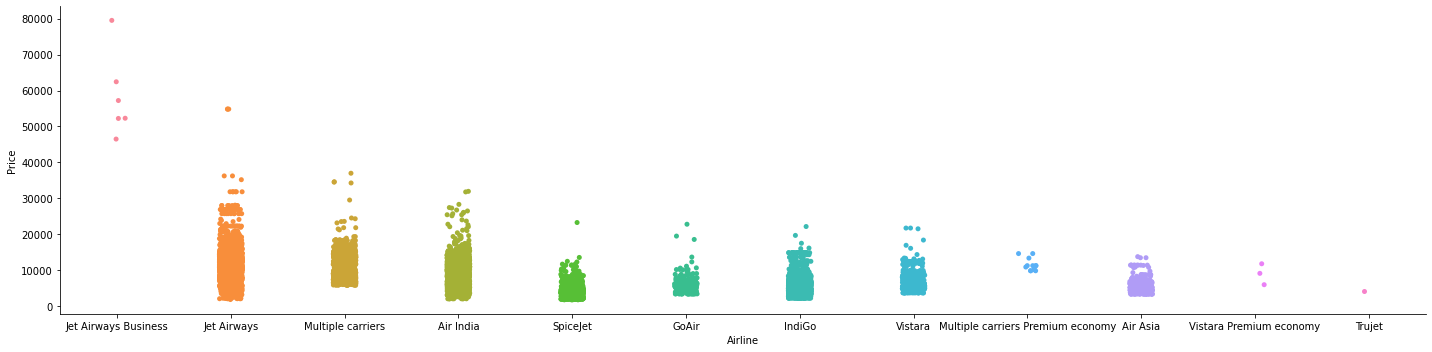

In [30]:
# Plotting Price vs Airline plot
sns.catplot(y = "Price", x = "Airline", data = traindf.sort_values("Price", ascending = False), kind="strip", height = 5, aspect = 4)
plt.show()

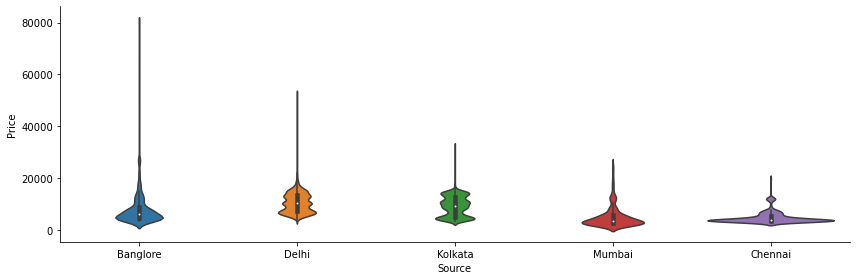

In [35]:
# Plotting Price vs Source
sns.catplot(y = "Price", x = "Source", data = traindf.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

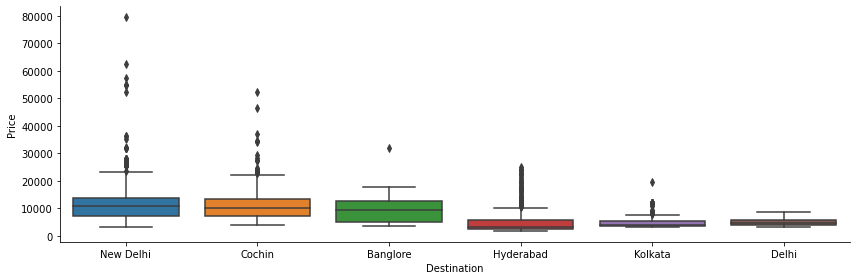

In [36]:
# Plotting Box plot for Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = traindf.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

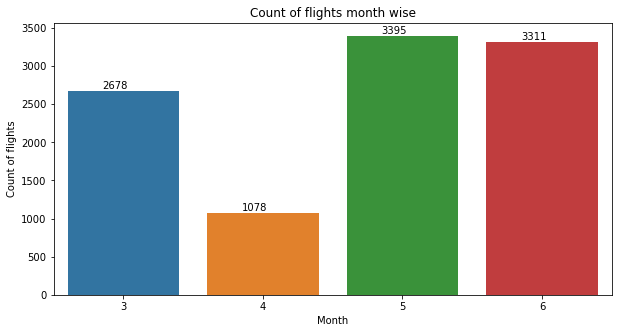

In [37]:
# Plotting Bar chart for Months (Duration) vs Number of Flights

plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = traindf)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

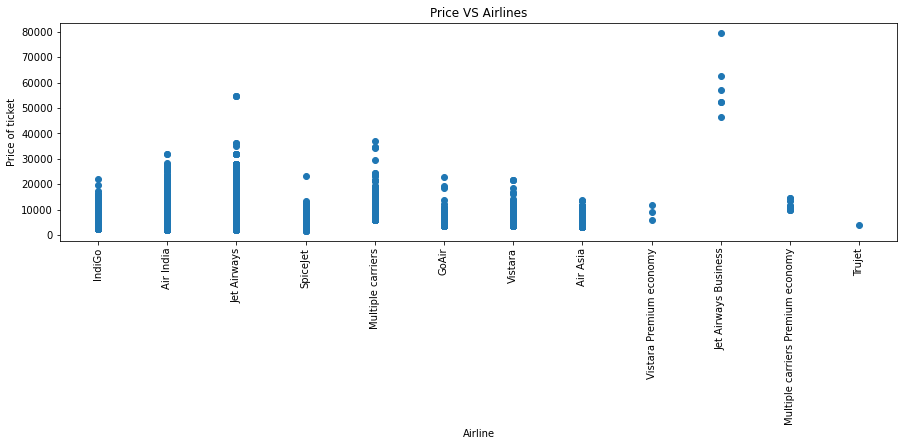

In [38]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(traindf['Airline'], traindf['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

### Correlation between all Features

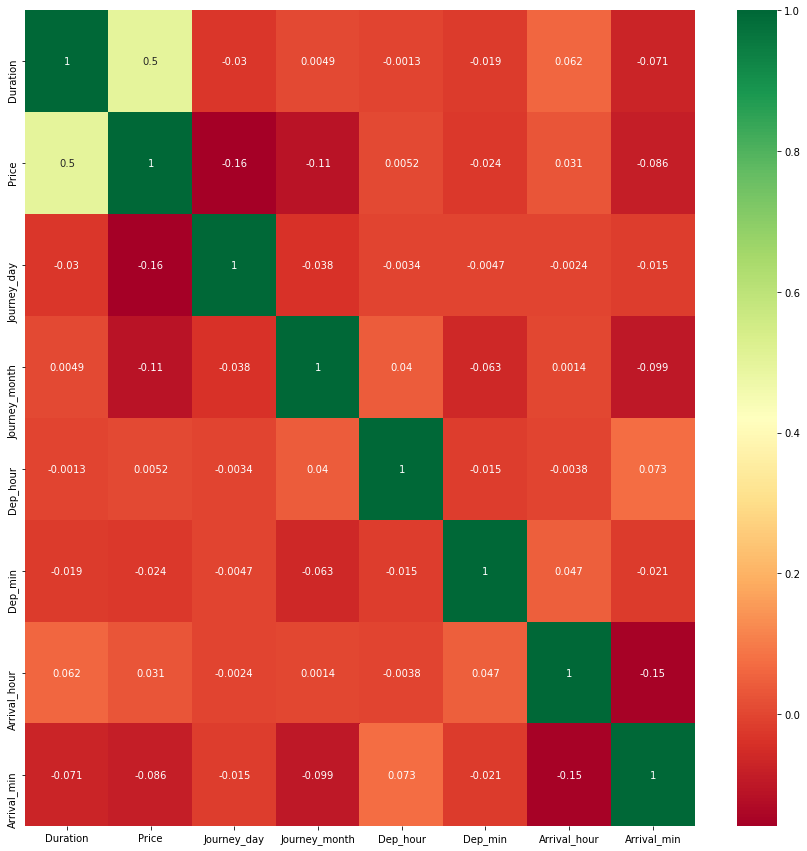

In [39]:
# Plotting Correation

plt.figure(figsize = (15,15))
sns.heatmap(traindf.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [40]:
# Dropping the Price, our target variable and storing our dataset into new dataframe

data = traindf.drop(["Price"], axis=1)

In [41]:
# Separating Categorical Data and Numerical Data

train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = testdf.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = testdf.select_dtypes(include=['int64', 'float','int32'])

In [45]:
train_categorical_data.head(2) #calling categorical data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info


In [44]:
train_numerical_data.head(2)

,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,24,3,22,20,1,10
1,445,1,5,5,50,13,15


In [46]:
# Label Encode and Hot Encode for Categorical Columns for train and test dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [47]:
train_categorical_data.head(3) 

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8


In [49]:
# Concatenating both Catagorical Data and Numerical Data. Defining X and Y

X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = traindf['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)
X.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25


In [51]:
y.head(3)

0     3897
1     7662
2    13882
Name: Price, dtype: int64

In [53]:
# Calculating Mean Absolute Percentage Error

from sklearn.metrics import mean_squared_error as mse

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
#Splitting dataset into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7323, 13)
The size of training output is (7323,)
The size of testing input is (3139, 13)
The size of testing output is (3139,)


### Decision Tree Regression

In [59]:
# Performing GridSearchCV on Decision Tree Regression

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [60]:
# Predicting train and test results

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [64]:
from math import sqrt
from sklearn.metrics import r2_score

In [65]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  421.9254006851631
Mean Absolute % Error:  2
R-Squared:  0.9917773268264986


In [66]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  2127.6225122543838
Mean Absolute % Error:  9
R-Squared:  0.7820373179896889


In [68]:
#saving model to desk
pickle.dump(tree, open('model.pk1','wb'))